# Emotion Recognition

### DESCRIPTION
Future customizations, such as understanding human emotions, could lead to a range of advancements, such as determining whether a person likes a specific statement, item or product, food, or how they are feeling in a particular circumstance, and so on. 

### Objective:
To build a model using a convolutional neural network that can classify a person's emotion

### Dataset description:
The dataset contains two folders named Train and Test. These folders have approximately 35,000 images of seven different human emotions, such as anger, disgust, fear, happiness, neutral, sadness, and surprise.

**Train folder:** This folder has images for training the model, which is divided into subfolders having the same name as the class. 

**Test folder:** This folder has images for testing the model, which is divided into subfolders having the same name as the class.

#### **Following operations should be performed using KERAS or PyTorch or Torch vision:**  
1. Import the necessary libraries
2. Plot sample images for all the classes 
3. Plot the bar graph for the number of images in each class for both training and testing data
4. Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48
5. Build a data augmentation for test data to create new data and rescale the image at 48x48
6. Read images directly from the train folder and test folder using the appropriate function

### Build 3 CNN model with: 
1. **CNN Architecture:**
    1. Add convolutional layers, max pool layers, dropout layers, batch normalization layers  
    2. Use Relu as activation functions
    3. Take loss function as categorical cross-entropy
    4. Take Adam as an optimizer
    5. Use early-stop with two patiences and monitor for validation loss
    6. Try with ten number epochs
    7. Train the model using the generator and test the accuracy of the test data at every epoch
    8. Plot the training and validation accuracy, and the loss
    9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good
    
2. **Customized CNN Architecture:**
    1. Add convolutional layers, max pool layers, dropout layers, batch normalization layers on the top of the first model architecture to improve the accuracy
    2. Change the batch size activation function and optimizer as rmsprop and observe if the accuracy increases
    3. Take the loss function as categorical cross-entropy
    4. Use early stopping with the patience of two epochs and monitoring of validation loss
    5. Try with ten number epochs
    6. Train the model using the generator and test the accuracy of the test data at every epoch
    7. Plot the training and validation accuracy, and the loss
    8. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good
    
3. **Transfer Learning:**
    1. Prepare the data for the transfer learning algorithm 
    2. Freeze the top layers of the pre-trained model     
    3. Add a dense layer at the end of the pre-trained model followed by a dropout layer
    4. Add the final output layer with the SoftMax activation function
    5. Take the loss function as categorical cross-entropy
    6. Take Adam as an optimizer
    7. Use early stopping with the patience of two epochs and monitor the validation loss which is set as minimum mode
    8. Try with fifteen number epochs
    9. Train the model using the generator and test the accuracy of the test data at every epoch
    10. Plot the training and validation accuracy, and the loss
    11. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

### Final Steps:
1. Compare all the models on the basis of accuracy, precision, recall, and f1-score
2. Write at least 3 more things to increase the model’s performance


## 1. Import the necessary libraries

In [1]:
# 1.Import the necessary libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import image_dataset_from_directory

sbold = '\033[1m' # Python format tag to start bold font setting
ebold = '\033[0m' # Python format tag to end bold font setting

## Explore the Images
The dataset downloaded from the Course Resource are orgainized in the `data` directory.

### Check the content in the `data` directory
- Get the filepath for each image
- Get the class (category) for each image

In [2]:
# Function to get the image class (label) from the image path

def get_image_class(dirpath):
    pos = dirpath.find('/', 8)
    label = dirpath[pos + 1:]
    return label


# Function to save image path and class for each file in directory         

def save_image_path(filenames, dirpath, image_files, image_classes):
    for file in filenames:
        filepath = dirpath + '/' + file
        image_files.append(filepath)
        image_class = get_image_class(dirpath)
        image_classes.append(image_class)

In [3]:
'''
Function to get the image filepath and classes for each of the images
in the 'data/train' and 'data/test' subfolders.
'''
import os

# Track count of images in 'data/train/*' and 'data/test/*' subfolders
train_image_count = 0 
test_image_count = 0

# Set up to store images filepath for each of the train and test images
train_files = []
test_files = []

# Setup to store classes for each of the train and test images
train_classes = []
test_classes = []

# Walk through data directory and list number of files in it
for dirpath, dirnames, filenames in os.walk("data"):
    
    # Check how many files and directorys in current directory
    num_files = len(filenames)
    num_dir = len(dirnames)
    
    # Show number of directories in path
    if num_dir > 1:
        print(f"There are {num_dir} directories in '{dirpath}' folder.")
        
    # if there are more than 1 file in directory (check for image files)
    if num_files > 1:
        # Ignore '.ipynb_checkpoints' file, save only files that are not this format
        if dirpath.find('.ipynb_checkpoints') == -1:
            print(f"There are {num_files} images in '{dirpath}' folder.")
            
            # Save images for train dataset
            if 'data/train/' in dirpath:
                train_image_count += num_files
                
                # Save fullpath for each of the image file name in directory
                save_image_path(filenames, dirpath, train_files, train_classes)

            else:
                # Save images for test dataset
                test_image_count += num_files
                
                # Save fullpath for each of the image file name in directory
                save_image_path(filenames, dirpath, test_files, test_classes)
                    
print(f"\nThere are a total of {train_image_count} images in 'train' dataset.")
print(f"\nThere are a total of {test_image_count} images in 'test' dataset.")

There are 2 directories in 'data' folder.
There are 7 directories in 'data/test' folder.
There are 1825 images in 'data/test/happy' folder.
There are 1139 images in 'data/test/sad' folder.
There are 1018 images in 'data/test/fear' folder.
There are 797 images in 'data/test/surprise' folder.
There are 1216 images in 'data/test/neutral' folder.
There are 960 images in 'data/test/angry' folder.
There are 111 images in 'data/test/disgust' folder.
There are 7 directories in 'data/train' folder.
There are 7164 images in 'data/train/happy' folder.
There are 4938 images in 'data/train/sad' folder.
There are 4103 images in 'data/train/fear' folder.
There are 3205 images in 'data/train/surprise' folder.
There are 4982 images in 'data/train/neutral' folder.
There are 3992 images in 'data/train/angry' folder.
There are 436 images in 'data/train/disgust' folder.

There are a total of 28820 images in 'train' dataset.

There are a total of 7066 images in 'test' dataset.


## Data Summary
- There are 2 directories under the `data` folder: `test` and `train`
- There are 7 directories in each of the `test` and `train` directories. Each of these subfolders represents an `emotion` class.
- The `emotions` are:
    - `happy`      :=  train images = 7164  ;  test images = 1825
    - `sad`        :=  train images = 4938  :  test images = 1139
    - `fear`       :=  train images = 4103  :  test images = 1018
    - `surprise`   :=  train images = 3205  :  test images = 797
    - `neutral`    :=  train images = 4982  :  test images = 1216
    - `angry`      :=  train images = 3992  :  test images = 960
    - `disgust`    :=. train images = 436   :  test images = 111
- There are a total of 28,820 emotion images in the `train` dataset
- There are a total of 7,066 emotion images in the `test` dataset

In [4]:
# Create DataFrame for train images with its path and classest

df_train = pd.DataFrame({'image_path': train_files, 'class': train_classes})
df_train.head(2)

,image_path,class
0,data/train/happy/train_happy_3663.jpg,happy
1,data/train/happy/train_happy_5212.jpg,happy


In [5]:
# Create DataFrame for test images with its path and classest

df_test = pd.DataFrame({'image_path': test_files, 'class': test_classes})
df_test.head(2)

,image_path,class
0,data/test/happy/test_happy_1717.jpg,happy
1,data/test/happy/test_happy_1071.jpg,happy


In [6]:
# Get the unique values from the 'class' as the 
# classes of emotions used for ploting sample images

classes = df_train['class'].unique()
classes

array(['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust'],
      dtype=object)

## 2. Plot the sample images for all the classes

In [9]:
# 2. Plot the sample images for all the classes

# Create a function to return a sample image for the specified emotion

def get_image(data, emotion):
    # Get the image path for the specified emotion from the data
    emotion_df = data[data['class'] == emotion]
    
    # Randomly get one of the emotion image path
    image_path = emotion_df.sample(1)['image_path'].values
    
    # Read the image from the path
    img_raw = tf.io.read_file(image_path[0])
    img = tf.io.decode_image(img_raw, channels=3)          # Get the image in rgb (channel=3)
    img = tf.image.convert_image_dtype(img, tf.float32)    # Convert (rescale) the image from 0-255 to 0-1
    
    return img

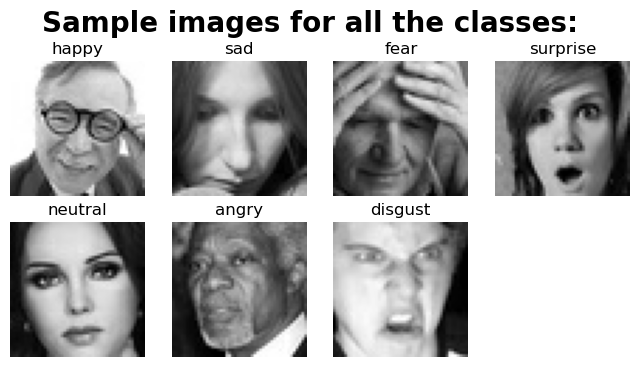

In [10]:
# Plot the sample images for all the classes

# Set figure size and title for the plot
fig = plt.figure(figsize=(8, 4))
fig.suptitle("Sample images for all the classes:", fontweight="bold", fontsize=20)

# Adjust the spacing between subplot and the top
plt.subplots_adjust(top=0.85)

# Show the sample images ( 4 images per row in 2 rows)
for i in range(len(classes)):
    plt.subplot(2, 4, i+1)
    image = get_image(df_train, classes[i])
    plt.title(classes[i], fontsize=12)
    plt.imshow(image)
    plt.axis('off')


### Observations:
The images are in grayscale even though it was read in as color images.

## 3. Plot the bar graph for the number of images in each class for both training and testing data

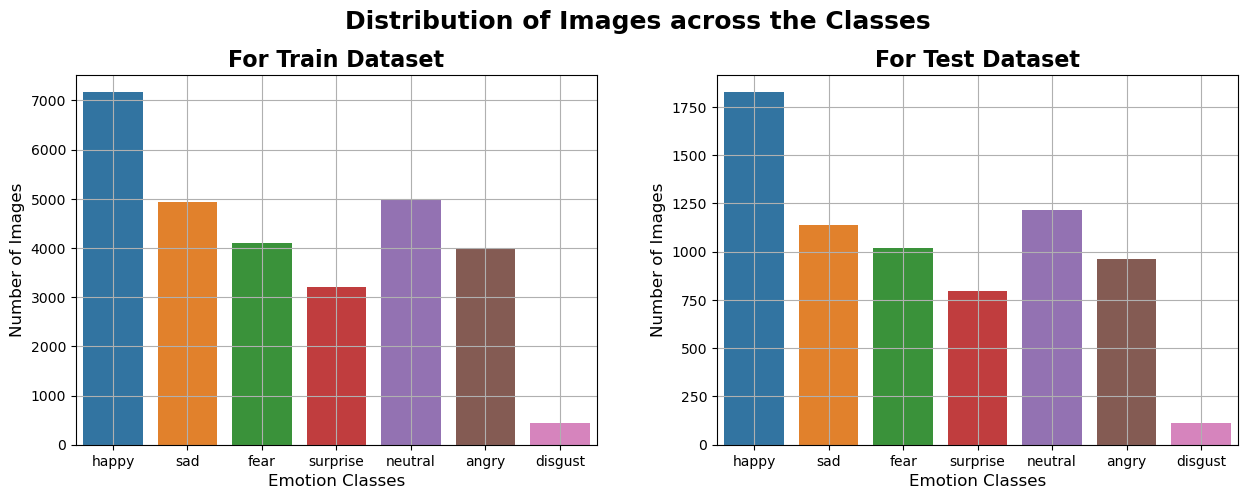

In [11]:
# 3. Plot the bar graph for the number of images in each class for both training and testing data

# Set figure size and title for plot
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Distribution of Images across the Classes", fontweight='bold', fontsize=18)

# Plot distribution for train data
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=df_train['class'])
ax1.set_title("For Train Dataset", fontweight='bold', fontsize=16)
ax1.set_xlabel("Emotion Classes", fontsize=12)
ax1.set_ylabel("Number of Images", fontsize=12)
ax1.grid(visible=True)

# Adjust the spacing between subplot and the top
plt.subplots_adjust(top=0.85, wspace=0.23)

# Plot distribution for test data
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=df_test['class'])
ax2.set_title("For Test Dataset", fontweight='bold', fontsize=16)
ax2.set_xlabel("Emotion Classes", fontsize=12)
ax2.set_ylabel("Number of Images", fontsize=12);
ax2.grid(visible=True)

#### Observations:
- There are very few images for the `disgust` emotion in comparison with the other emotions
- The `happy` emotion has more than 1/3 more images than the other emotions

## 4. Build a data augmentation for train data to create new data with <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;translation, rescale and flip, and rotation transformations. <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Rescale the image at 48x48

In [12]:
# 4. Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations.
#    Rescale the image at 48x48

IMG_SIZE = 48                                    # Image size is to be set at 48
CHANNEL = 1                                      # For grayscale, channel = 1
IMAGE_SHAPE = (IMG_SIZE, IMG_SIZE, CHANNEL)      # Grayscale image shape = (48, 48, 1)

# Define function to return the preprocessing layer for resize and rescale
# The input_shape for the Neural Network is pass in as a parameter to use 
# in the first layer when building CNN.
# The preprocessing layers are return as a list of layers.

def get_preprocessing_layer(image_shape):
    return [
        tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE, input_shape=image_shape),
        tf.keras.layers.Rescaling(1./255)
    ]
    
        
# Function to return a list of data augmentation layers for Translation, Flip and Rotation.

def get_data_augmentation_layers():
    return [
        tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, seed=42),
        tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=42),
        tf.keras.layers.RandomRotation(0.3, seed=42)
    ]


# Data augmentation layers setup as a list to be used when building CNN.
data_augmentation = get_data_augmentation_layers()


# Same data augmentation setup to use for visualization
data_augment = tf.keras.Sequential(get_data_augmentation_layers())

## 5. Build a data augmentation for test data to create new data and rescale the image at 48x48

In [13]:
# 5. Build a data augmentation for test data to create new data and rescale the image at 48x48

resize_and_rescale = tf.keras.Sequential(
    [
        tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
        tf.keras.layers.Rescaling(1./255)
    ]
)

## 6. Read images directly from the train folder and test folder using the appropriate function

In [14]:
''' 
Function to read images directly from the folder 
using tf.keras.utils.image_dataset_from_directory

get_image_data read the images from the specified directory

The color_mode is defaulted to 'rgb' for color images. 
It can be changed to 'grayscale' for black and white images.

The default label_mode is kept as 'int' but can be changed to 'categorical'.

If a subset value (either 'training' or 'validation' is specified then 
the data in the directory will be split as 80/20 for the training and 
validation subset respectively. 

The default for validation_split is set to 'None'.

If data is to be separated into training and validation subset, this
function need to be call for each independtly
'''

def get_image_data(directory, color_mode='rgb', label_mode='int', seed=None, subset=None, validation_split=None):
    if subset:
        validation_split = 0.2
        
    raw_data_set = image_dataset_from_directory(directory=directory,
                                                label_mode=label_mode,
                                                color_mode=color_mode,
                                                image_size=(IMG_SIZE, IMG_SIZE),
                                                seed=seed,
                                                validation_split=validation_split, 
                                                subset=subset
                                               )
    
    return raw_data_set 

- Since the images in the directories are 'black-and-white' `grayscale` images, the process will only read images in as `grayscale`.

- Since the requirements asked to 'test the accuracy of the test data at every epoch', we are going to use the `test data` for validation during model training and therefore no validation data is required to be splitted from the training data

- Only the `train` and `test` datasets will be read directly from the train and test folder

In [15]:
SEED = 42

# Read images directly from the train and test folders

# Train dataset images read directly from the 'data/train' directory
train_ds = get_image_data(directory='data/train',
                          color_mode='grayscale', 
                          label_mode='categorical',
                          seed=SEED)


# Test dataset images read directly from the 'data/test' directory
test_ds = get_image_data(directory='data/test', 
                         color_mode='grayscale',
                         label_mode='categorical'
                        )

print('\nTrain classes:', train_ds.class_names)
print('Test classes:', test_ds.class_names)

print('\nTrain data type:', train_ds)
print('\nTest data type:', test_ds)

Found 28820 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.

Train classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Test classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Train data type: <_BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

Test data type: <_BatchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>


### Visualize the images read from directory

In [16]:
# Show the first 8 of its original and augmented images from a  batch of 32 images

def show_image(title, batch_images, batch_labels, class_names, grayscale=False, augmented=False, test_image=False):
    # Set figure size and title
    fig = plt.figure(figsize=(16,2))
    fig.suptitle(title, fontweight='bold', fontsize=14)
    
    # For each of the image in the batch
    for img_index, image in enumerate(batch_images):

        # Show image
        if augmented:
            # Preprocess image - resize and rescale
            image = resize_and_rescale(image)

            if not test_image:
                image = data_augment(image)
            
        # Plot the image
        plt.subplot(1, 8, img_index + 1)
        plt.title(class_names[np.argmax(batch_labels[img_index])])
        
        # Show grayscale images
        if grayscale:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
        plt.axis('off')
        
        # Show only the first 8 images in the batch of 32
        if img_index == 7:
            break

    # Adjust the spacing between subplot and the top
    plt.subplots_adjust(top=0.75)

In [17]:
# Get the first batch of 32 train dataset images
batch_images, batch_labels = iter(train_ds).get_next()

# Get the class names of the images
class_names = train_ds.class_names

print('Batch images shape:', batch_images.shape, 'Labels shape:', batch_labels.shape)
print('Class Names:', class_names)

Batch images shape: (32, 48, 48, 1) Labels shape: (32, 7)
Class Names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Training data are augmented for variety used in model training
- The original images were randomly flipped, translated or rotated to form the augmented images

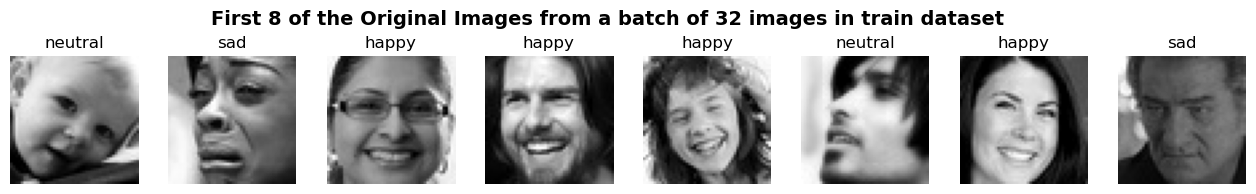

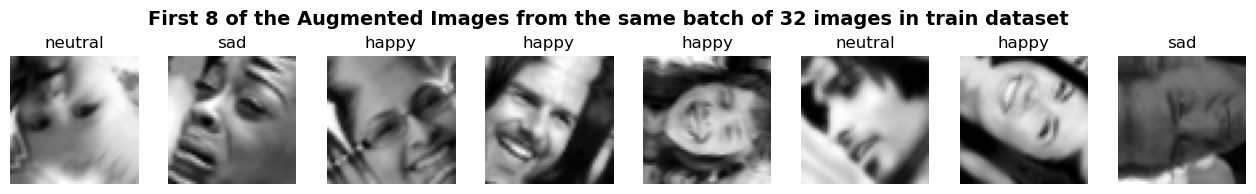

In [18]:
# Show images for train dataset

# Show original images 
show_image("First 8 of the Original Images from a batch of 32 images in train dataset",
           batch_images, batch_labels, class_names, grayscale=True)

# Show augmented images
show_image("First 8 of the Augmented Images from the same batch of 32 images in train dataset", 
           batch_images, batch_labels, class_names, grayscale=True, augmented=True)


In [19]:
# Get the first batch of 32 test dataset images
test_batch_images, test_batch_labels = iter(test_ds).get_next()

# Get the class names of the images
class_names = test_ds.class_names

print('Batch images shape for test data:', test_batch_images.shape, 'Labels shape:', test_batch_labels.shape)
print('Class Names:', class_names)

Batch images shape for test data: (32, 48, 48, 1) Labels shape: (32, 7)
Class Names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Test data are only augmented with resize and rescale
- The original test images were only resized and rescaled for the augmented images
- Since the images were originally read in same as the resize image size of 48 x 48, there is no obvious differences between the original and augmented images for the test data

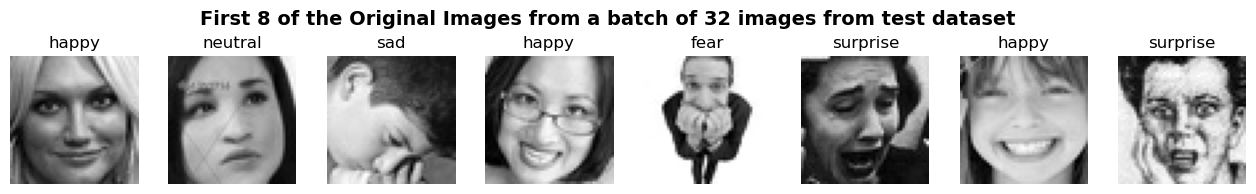

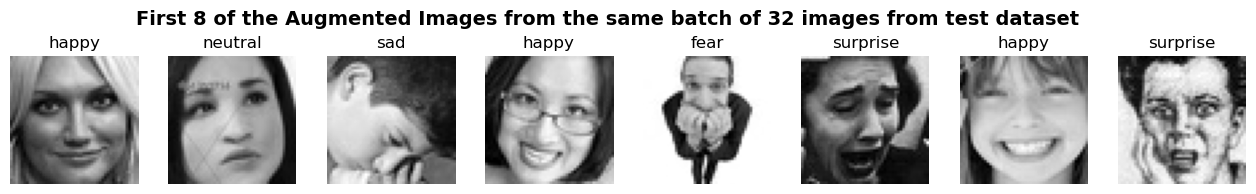

In [20]:
# Show agumented images for test data

# Show original images 
show_image("First 8 of the Original Images from a batch of 32 images from test dataset",
           test_batch_images, test_batch_labels, class_names, grayscale=True, augmented=False, test_image=True)

# Show augmented images
show_image("First 8 of the Augmented Images from the same batch of 32 images from test dataset", 
           test_batch_images, test_batch_labels, class_names, grayscale=True, augmented=True, test_image=True)

# Build 3 CNN model with:

## 1. CNN Architecture:
1. Add convolutional layers, max pool layers, dropout layers, batch normalization layers
2. Use Relu as activation functions
3. Take loss function as categorical cross-entropy
4. Take Adam as an optimizer
5. Use early-stop with two patients and monitor for validation loss
6. Try with ten number epochs
7. Train the model using the generator and test the accuracy of the test data at every epoch
8. Plot the training and validation accuracy, and the loss
9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [21]:
# Configure dataset for better performance

# Color images - train, validation and test
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
# Show the data type for the train and test dataset
train_ds, test_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>)

- The dataset had been changed from Tensor _BatchDataset to Tensorflow _PrefetchDataset after it had been configure for better performance

In [23]:
# 1. Add convolutional layers, max pool layers, dropout layers, batch normalization layers
# 2. Use Relu as activation functions

# Create functions to build the CNN model

num_classes = len(class_names)

# Define the Convolutional, BatchNormalization and MaxPooling layers

def conv_2d_pooling_normalization_layers(filters):
    return [
        tf.keras.layers.Conv2D(filters=filters, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=2)
    ]


# Define the Fully Connected Network

dense_layers = [
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)              # there are 7 classes in the dataset     
]


# Build the CNN mode with the preprocessing, data augmentation, convolutional and fully connected network

def build_cnn_model(num_classes, color_image=False):
    if color_image:
        preprocessing_layer = get_preprocessing_layer((IMG_SIZE, IMG_SIZE, 3))
    else:
        preprocessing_layer = get_preprocessing_layer((IMG_SIZE, IMG_SIZE, 1)) 
    
    model = Sequential(preprocessing_layer +
                       data_augmentation +
                       conv_2d_pooling_normalization_layers(16) +
                       conv_2d_pooling_normalization_layers(32) +
                       conv_2d_pooling_normalization_layers(64) +
                       dense_layers
                      )
    return model


# Create function to compile the model
# 3. Take loss function as categorical cross-entropy
# 4. Take Adam as an optimizer

def compile_model(model):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    

# Create function to train the model
# 5. Use early-stop with two patients and monitor for validation loss
# 6. Try with ten number epochs
# 7. Train the model using the generator and test the accuracy of the test data at every epoch

NUM_EPOCHS = 10
BATCH_SIZE = 32

callback = EarlyStopping(monitor="val_loss", patience=2)

def train_model(model, train_data, val_data):
    history = model.fit(x=train_data,
                        batch_size=BATCH_SIZE,
                        epochs=NUM_EPOCHS,
                        verbose=1,
                        callbacks=callback,
                        validation_data=val_data)
    return history

In [24]:
# Build and compile the CNN model

# Build model
cnn_model = build_cnn_model(num_classes)

# Compile the model
compile_model(cnn_model)

In [25]:
# Train model

cnn_history = train_model(cnn_model, train_ds, test_ds)

Epoch 1/10
901/901 [==============================] - 18s 18ms/step - loss: 8.1919 - accuracy: 0.1982 - val_loss: 6.9556 - val_accuracy: 0.1626
Epoch 2/10
901/901 [==============================] - 16s 18ms/step - loss: 8.0681 - accuracy: 0.1896 - val_loss: 9.3383 - val_accuracy: 0.2150
Epoch 3/10
901/901 [==============================] - 16s 18ms/step - loss: 7.6798 - accuracy: 0.1922 - val_loss: 9.0683 - val_accuracy: 0.1903


In [26]:
# 8. Plot the training and validation accuracy, and the loss

# Plot training and validation accuracy and loss curves
def plot_accuracy_loss_curves(history):
    """
    Display the accuracy and loss curves for the training and validation metrics.
    """
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plt.subplots_adjust(top=0.85, wspace=0.4)

    fig.suptitle("Accuracy and Loss Curves for Training and Validation Metrics", 
                 fontweight='bold', fontsize='20')
    
    epochs = range(1, len(history.history["accuracy"]) + 1) # how many epochs we run for?

    # Plot accuracy
    ax1.plot(epochs, accuracy, label="training_accuracy")
    ax1.plot(epochs, val_accuracy, label="val_accuracy")
    ax1.set_title("Accuracy Curve", fontweight='bold', fontsize='18')
    ax1.set_xlabel("epochs", fontsize='14')
    ax1.set_ylabel("accuracy", fontsize='14')
    ax1.legend(fontsize=11)
    
    # Plot loss
    ax2.plot(epochs, loss, label="training_loss")
    ax2.plot(epochs, val_loss, label="val_loss")
    ax2.set_title("Loss Curve", fontweight='bold', fontsize='18')
    ax2.set_xlabel("epochs", fontsize='14')
    ax2.set_ylabel("loss", fontsize='14')
    ax2.legend(fontsize=11);

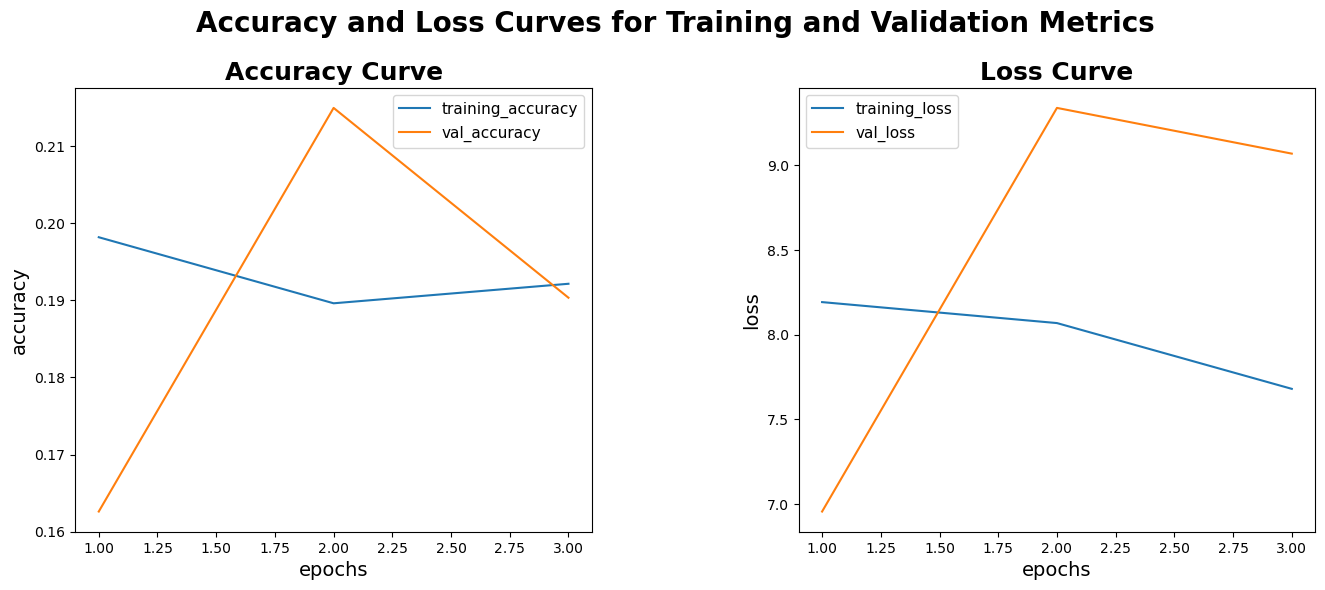

In [27]:
plot_accuracy_loss_curves(cnn_history)

In [28]:
# 9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, 
#    and determine if the model’s classes are good

preds = cnn_model.predict(test_ds, verbose=0)
preds[0]

array([ 199.67804 ,  108.70665 , -201.77608 ,  265.09805 ,  -90.399895,
       -115.69266 , -130.86578 ], dtype=float32)

In [28]:
from sklearn.metrics import classification_report

test_batch_images, test_batch_labels = iter(test_ds).get_next()

test_batch_labels
# report = classification_report(actuals, preds_5_gray, output_dict=True)

<tf.Tensor: shape=(32, 7), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.

In [80]:
# Function that convert the model predictions probabilities matrix to return the predicted labels
def get_labels(data):
                   
    """
    Return a list of class labels from the categorical labels
    """
    
    labels = []
    
    for i in range(len(data)):
        batch_images, batch_labels = next(test_ds.as_numpy_iterator())
        
        if i == 1:
            show_image("", batch_images, batch_labels, class_names, grayscale=True)
            show_image("", batch_images[8:], batch_labels[8:], class_names, grayscale=True)
            show_image("", batch_images[16:], batch_labels[16:], class_names, grayscale=True)
            show_image("", batch_images[24:], batch_labels[24:], class_names, grayscale=True)
            
        for j in range(len(batch_labels)):
            labels.append(np.argmax(batch_labels[j]))
        
    # return the list of numerical labels (classes 0 ~ 6)
    return labels

In [72]:
#_, labels = next(test_ds.as_numpy_iterator())
len(test_ds)

221

7072

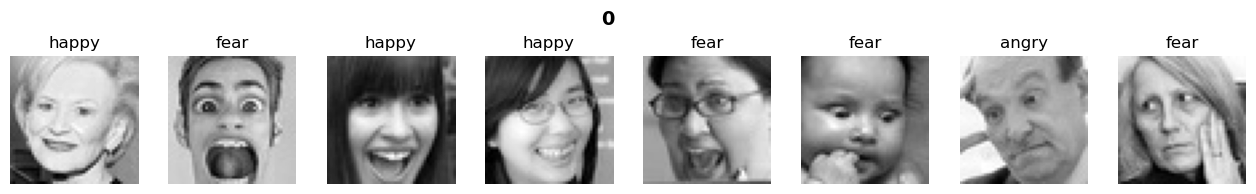

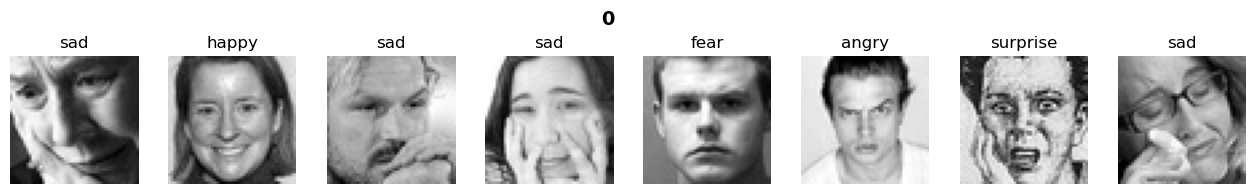

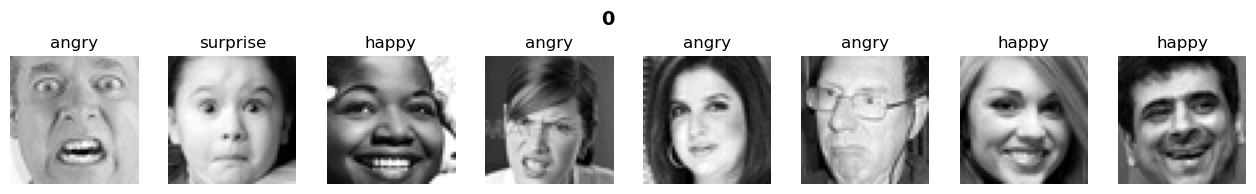

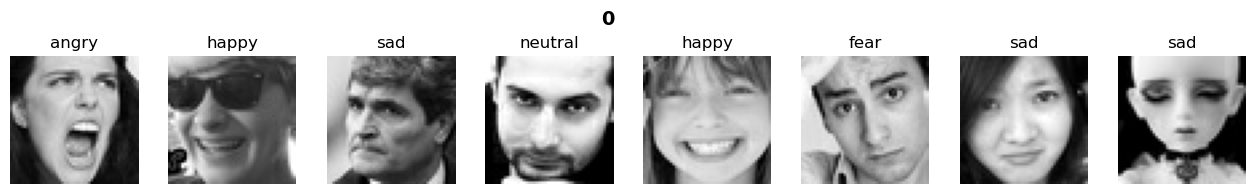

In [81]:
labels = get_labels(test_ds)
len(labels)

In [40]:
7072 / 32

221.0

In [34]:
# Function that convert the model predictions probabilities matrix to return the predicted labels
def get_model_prediction_labels(model, data):
    """
    Use model.predict() to find the predictions probabilities
    Return a list of predicted labels decoded from the probabilites
    """
    # Predicts with the specified model and data
    preds = model.predict(data, verbose=0)
    
    # return the list of predictions converted to numerical labels (0 ~ 42)
    return np.array([np.argmax(preds[i]) for i in range(len(preds))])

In [35]:
get_model_prediction_labels(cnn_model, test_ds)

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
preds = cnn_model.predict(test_ds, verbose=0)


array([  64.64292 ,   47.265938, -105.78148 , -102.848305,  -73.23077 ,
         54.409885,   85.55848 ], dtype=float32)

In [62]:
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']